# Advanced Dataframes Exercises

In [59]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:



In [2]:
mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




- **On average, which manufacturer has the best miles per gallon?**

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [37]:
#add a columns for average mpg:
mpg['avg_mpg'] = (mpg.cty+mpg.hwy)/2

#use group by to group manufacturers and return the max average mpg
mpg.groupby('manufacturer').avg_mpg.mean().sort_values(ascending=False).round(2).nlargest(1, keep='all')

#remember that .idmax will return the index value if I wanted just 'honda' returned

manufacturer
honda    28.5
Name: avg_mpg, dtype: float64

- **How many different manufacturers are there?**

In [39]:
#initially I tookd the length of the count of manufacturers:
len(mpg.groupby("manufacturer").manufacturer.count())


#re-discovered nunique during demo:
mpg.manufacturer.nunique()

#andddddddd.... .descibe would also work :)

mpg.manufacturer.describe()

count       234
unique       15
top       dodge
freq         37
Name: manufacturer, dtype: object

- **How many different models are there?**

In [6]:
len(mpg.groupby('model').model.count())

38

- **Do automatic or manual cars have better miles per gallon?**

In [7]:
# group by transmision type:
mpg.groupby("trans").avg_mpg.mean()

#however this shows that there are subgroups for each category (auto and manual), so I need to classify further...

trans
auto(av)      23.900000
auto(l3)      24.000000
auto(l4)      18.951807
auto(l5)      17.717949
auto(l6)      16.833333
auto(s4)      22.166667
auto(s5)      21.333333
auto(s6)      21.281250
manual(m5)    22.775862
manual(m6)    20.552632
Name: avg_mpg, dtype: float64

In [8]:
# create a new column to identify broadly whether a car is manual or automatic:
# using lambda condition to assign the values of automatic or manual to each row 
mpg['trans_type'] = mpg.trans.apply(lambda n: 'manual' if n == 'manual(m5)' or n == 'manual(m6)' else 'automatic')

In [9]:
# apply groupby to the new column of trans_type
mpg.groupby('trans_type').avg_mpg.mean()

trans_type
automatic    19.130573
manual       22.227273
Name: avg_mpg, dtype: float64

## 2. Joining and Merging

- **Copy the users and roles dataframes from the examples above.**

In [10]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [11]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


- **What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?**

In [44]:
# a right join returns all of the roles(right) but not all of the users(left)
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [43]:
# a left join returns all of the users(left) but not all of the roles(right)
pd.merge(users, roles, left_on='role_id', right_on='id', how='left', indicator=True)

# indicator=True returns a column that describes what data is inlcuded as a nice check. 


,id_x,name_x,role_id,id_y,name_y,_merge
0,1,bob,1.0,1.0,admin,both
1,2,joe,2.0,2.0,author,both
2,3,sally,3.0,3.0,reviewer,both
3,4,adam,3.0,3.0,reviewer,both
4,5,jane,NaN,NaN,NaN,left_only
5,6,mike,NaN,NaN,NaN,left_only


In [14]:
# an outer join returns all of the rows in both users and roles
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [15]:
# an inner join returns only the users that have roles and roles that have users
pd.merge(users, roles, left_on='role_id', right_on='id', how='inner')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


In [46]:
# the data will be displaced without the foreign key 
# because the tables will be joined on columns that aren't a coresponding match

## 3. Getting data from SQL databases

- **a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.**

In [47]:
from env import host, user, password

def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/employees'
    
    

- **b. Use your function to obtain a connection to the employees database.**

In [49]:
sql = """
select *
from employees
limit 5
"""

pd.read_sql(sql, get_db_url('employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


- **c. Once you have successfully run a query:**

    - Intentionally make a typo in the database url. What kind of error message do you see?
        - OperationalError: Access denied

    - Intentionally make an error in your SQL query. What does the error message look like?
        -ProgrammingError: You have an error in your SQL syntax...


- **d. Read the employees and titles tables into two separate dataframes**

In [52]:
emp = """
select *
from employees

"""

emp_db = pd.read_sql(emp, get_db_url('employees'))
emp_db.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [53]:
titles = """
select *
from titles

"""

titles_db = pd.read_sql(titles, get_db_url('titles'))
titles_db.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


- **e. Visualize the number of employees with each title.**

In [56]:
# I group by title and return a count. This is historical for
title_data = titles_db.groupby('title').title.count()

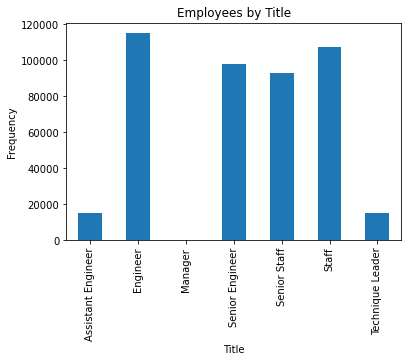

In [63]:
# create a bar chart to visulaize the data:
title_data.plot.bar()

plt.ylabel('Frequency')
plt.xlabel('Title')
plt.title('Employees by Title')

plt.show()

- **f. Join the employees and titles dataframes together.**

In [22]:
emp_and_titles_db = pd.merge(emp_db, titles_db, on='emp_no', how='inner')
emp_and_titles_db.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


- **g. Visualize how frequently employees change titles.**

In [64]:
#value counts returns the number of employees who have had n number of titles
title_change = emp_and_titles_db.groupby('emp_no').title.count().value_counts()

title_change

1    159754
2    137256
3      3014
Name: title, dtype: int64

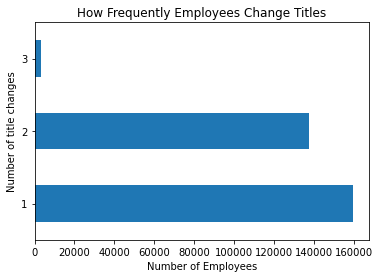

In [69]:
title_change.plot.barh()
plt.title('How Frequently Employees Change Titles')
plt.ylabel('Number of title changes')
plt.xlabel('Number of Employees')

plt.show()

- **h. For each title, find the hire date of the employee that was hired most recently with that title.**

In [24]:
emp_and_titles_db.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

- **i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)**

In [71]:
sql = """
select *
from employees
join titles using(emp_no)
join dept_emp using(emp_no)
join departments using(dept_no)
where titles.to_date > now()
"""

titles_by_dept = pd.read_sql(sql, get_db_url('employees'))

titles_by_dept.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,from_date,to_date,dept_name
0,d005,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,1986-06-26,9999-01-01,Development
1,d007,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,1996-08-03,9999-01-01,Sales
2,d004,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,1995-12-03,9999-01-01,Production
3,d004,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,1986-12-01,9999-01-01,Production
4,d003,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01,1989-09-12,9999-01-01,Human Resources


In [73]:
pd.crosstab(titles_by_dept.title, titles_by_dept.dept_name, margins=True)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales,All
title,,,,,,,,,,
Assistant Engineer,68,1833,0,0,0,1542,433,77,0,3953
Engineer,627,15677,0,0,0,13325,3744,830,0,34203
Manager,1,1,1,1,1,1,1,1,1,9
Senior Engineer,1790,43364,0,0,0,37156,10390,2250,0,94950
Senior Staff,12349,1085,10650,10843,12371,1123,0,10219,32032,90672
Staff,3902,315,3199,3416,3880,349,0,3206,9967,28234
Technique Leader,241,6117,0,0,0,5210,1422,321,0,13311
All,18978,68392,13850,14260,16252,58706,15990,16904,42000,265332


## 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [82]:
chipotle_sql = """
select *
from chipotle.orders
"""

orders_db = pd.read_sql(chipotle_sql, get_db_url('chipotle'))

In [83]:
orders_db.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


- **What is the total price for each order?**

In [84]:
orders_db.item_price = orders_db.item_price.str.replace('$', ' ').astype('float')

In [85]:
orders_db.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

- **What are the most popular 3 items?**

In [86]:
orders_db.groupby('item_name').quantity.sum().sort_values(ascending=False)[:3]

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

- **Which item has produced the most revenue?**

In [87]:
item_sales = orders_db.groupby('item_name').item_price.sum().sort_values(ascending=False)[:1]
item_sales

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64